In [219]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
import pandas as pd
import warnings
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score

import lazypredict
from lazypredict.Supervised import LazyClassifier

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [221]:
# accessing data from google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
# reading data from excel file named obesity project 
df = pd.read_excel('/content/drive/MyDrive/college/College Project/HA project/diabetes prediction/obesity project.xls', sheet_name='new trial group')
df.head()

,Age (yrs),Sex,Diagnosis,Ht (cms),baseline Wt (kg),follow up wt,Baseline BMI (Kg/m2),after intervention BMI (Kg/m2),waist,hip,waist:hip ratio,job type,remarks,physical activity,baseline FBS,after trial FBS,PPBS,after trial PPBS,baseline HBA1C,trial HBA1C,Total cholestrol,after intervention Total cholestrol,triglycerides,after intervention triglycerides,hdl,after intervention,ldl,after intervention ldl,Prescribed Calories,patient intake Calories,after intervention calories,protein intake,AFTER INTERVENTION PROTEIN INTAKE,cho intake,AFTER INTERVENTION cho intake,fat intake,AFTER INTERVENTION fat intake
0,54,2,"diabetic mellitus,obese class2",165,91.00,85.00,33.60,31.40,41,60,0.68,house wife,not consuming healthy snacks\n irregular meal ...,no,139.00,125.00,156.00,160.00,7.30,NaN,167.00,NaN,93.00,NaN,44.00,NaN,94.00,NaN,1400.00,1594.00,1459.00,60.30,57.00,253.00,250.00,31.90,30.00
1,56,1,"diabetic mellitus,obese class1",164,77.50,76.50,29.60,29.40,39,48,0.81,bussiness,irregular meal pattern,walking daily 1/2hr,143.00,134.00,181.00,175.00,9.00,8.00,180.00,NaN,128.00,NaN,36.00,NaN,110.00,NaN,1400.00,1420.00,1320.00,50.40,51.00,268.70,258.00,31.90,30.00
2,46,1,"diabetic mellitus,obese class1",158,68.80,67.20,27.50,27.00,38,39,0.97,shop keeper,irregular meal pattern,no,100.00,110.00,122.00,127.00,6.50,NaN,146.00,NaN,101.00,NaN,34.00,NaN,84.00,NaN,1400.00,1441.00,1350.00,49.90,45.00,274.50,270.00,16.49,17.00
3,58,2,"diabetic mellitus,obese class2",153,69.80,68.00,30.00,29.00,39,42,0.92,house wife,"irregular meal pattern,\nnot consuming healthy...",walking weekly \nthree times 20mins,211.00,108.00,272.00,171.00,9.80,7.50,138.00,NaN,168.00,NaN,34.00,NaN,73.00,NaN,1200.00,1203.00,1255.00,33.00,35.00,187.90,189.00,23.00,20.00
4,57,1,diabetes mellitus obese class 2,174,91.50,90.00,30.50,30.00,43,44,0.97,bussiness,taking more oily items,walking 2 hrs/day,182.00,185.00,285.00,260.00,10.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400.00,1471.00,1456.00,53.30,55.00,233.40,232.00,30.90,28.00


In [223]:
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 149 rows , 37 columns


In [224]:
df.dtypes

Age (yrs)                                int64
Sex                                      int64
Diagnosis                               object
Ht (cms)                                 int64
baseline Wt (kg)                       float64
follow up wt                           float64
Baseline BMI (Kg/m2)                   float64
after intervention BMI (Kg/m2)         float64
waist                                    int64
hip                                      int64
waist:hip ratio                        float64
job type                                object
remarks                                 object
physical activity                       object
baseline FBS                           float64
after trial FBS                        float64
PPBS                                   float64
after trial PPBS                       float64
baseline HBA1C                         float64
trial HBA1C                            float64
Total cholestrol                       float64
after interve

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age (yrs)                            149 non-null    int64  
 1   Sex                                  149 non-null    int64  
 2   Diagnosis                            149 non-null    object 
 3   Ht (cms)                             149 non-null    int64  
 4   baseline Wt (kg)                     149 non-null    float64
 5   follow up wt                         148 non-null    float64
 6   Baseline BMI (Kg/m2)                 149 non-null    float64
 7   after intervention BMI (Kg/m2)       139 non-null    float64
 8   waist                                149 non-null    int64  
 9   hip                                  149 non-null    int64  
 10  waist:hip ratio                      149 non-null    float64
 11  job type                        

In [226]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (yrs),149.00,50.92,7.02,24.00,47.00,53.00,57.00,66.00
Sex,149.00,1.34,0.47,1.00,1.00,1.00,2.00,2.00
Ht (cms),149.00,162.34,8.73,143.00,155.00,162.00,168.00,185.00
baseline Wt (kg),149.00,80.52,12.60,59.50,72.10,78.50,86.50,133.60
follow up wt,148.00,78.50,13.27,30.00,70.00,77.50,85.00,135.00
Baseline BMI (Kg/m2),149.00,31.12,5.63,26.00,28.00,30.00,32.70,78.00
after intervention BMI (Kg/m2),139.00,29.78,3.63,24.50,27.40,29.00,31.65,50.40
waist,149.00,39.58,4.20,31.00,37.00,39.00,41.00,60.00
hip,149.00,43.16,5.12,12.00,40.00,43.00,45.00,61.00
waist:hip ratio,149.00,0.91,0.08,0.38,0.86,0.92,0.97,1.07


# Handling Missing Data

In [227]:
df.isna().sum()

Age (yrs)                                0
Sex                                      0
Diagnosis                                0
Ht (cms)                                 0
baseline Wt (kg)                         0
follow up wt                             1
Baseline BMI (Kg/m2)                     0
after intervention BMI (Kg/m2)          10
waist                                    0
hip                                      0
waist:hip ratio                          0
job type                                 0
remarks                                  1
physical activity                        1
baseline FBS                             1
after trial FBS                         71
PPBS                                     1
after trial PPBS                        70
baseline HBA1C                           1
trial HBA1C                             81
Total cholestrol                         5
after intervention Total cholestrol    147
triglycerides                            5
after inter

In [228]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [229]:
Missing_Values(df)

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
after intervention triglycerides,149,147,0.99,float64,"[nan, 280.0, 185.0]",3
after intervention Total cholestrol,149,147,0.99,float64,"[nan, 162.0, 150.0]",3
after intervention ldl,149,147,0.99,float64,"[nan, 89.0, 80.0]",3
after intervention,149,147,0.99,float64,"[nan, 38.0, 37.0]",3
trial HBA1C,149,81,0.54,float64,"[nan, 8.0, 7.5, 6.8, 7.9, 8.1, 7.0, 8.5, 8.6, ...",24
AFTER INTERVENTION cho intake,149,80,0.54,float64,"[250.0, 258.0, 270.0, 189.0, 232.0, 256.0, 212...",51
AFTER INTERVENTION PROTEIN INTAKE,149,80,0.54,float64,"[57.0, 51.0, 45.0, 35.0, 55.0, 56.0, 74.0, 42....",34
after intervention calories,149,79,0.53,float64,"[1459.0, 1320.0, 1350.0, 1255.0, 1456.0, 1555....",38
AFTER INTERVENTION fat intake,149,75,0.50,float64,"[30.0, 17.0, 20.0, 28.0, 29.0, 34.0, 25.0, 33....",27


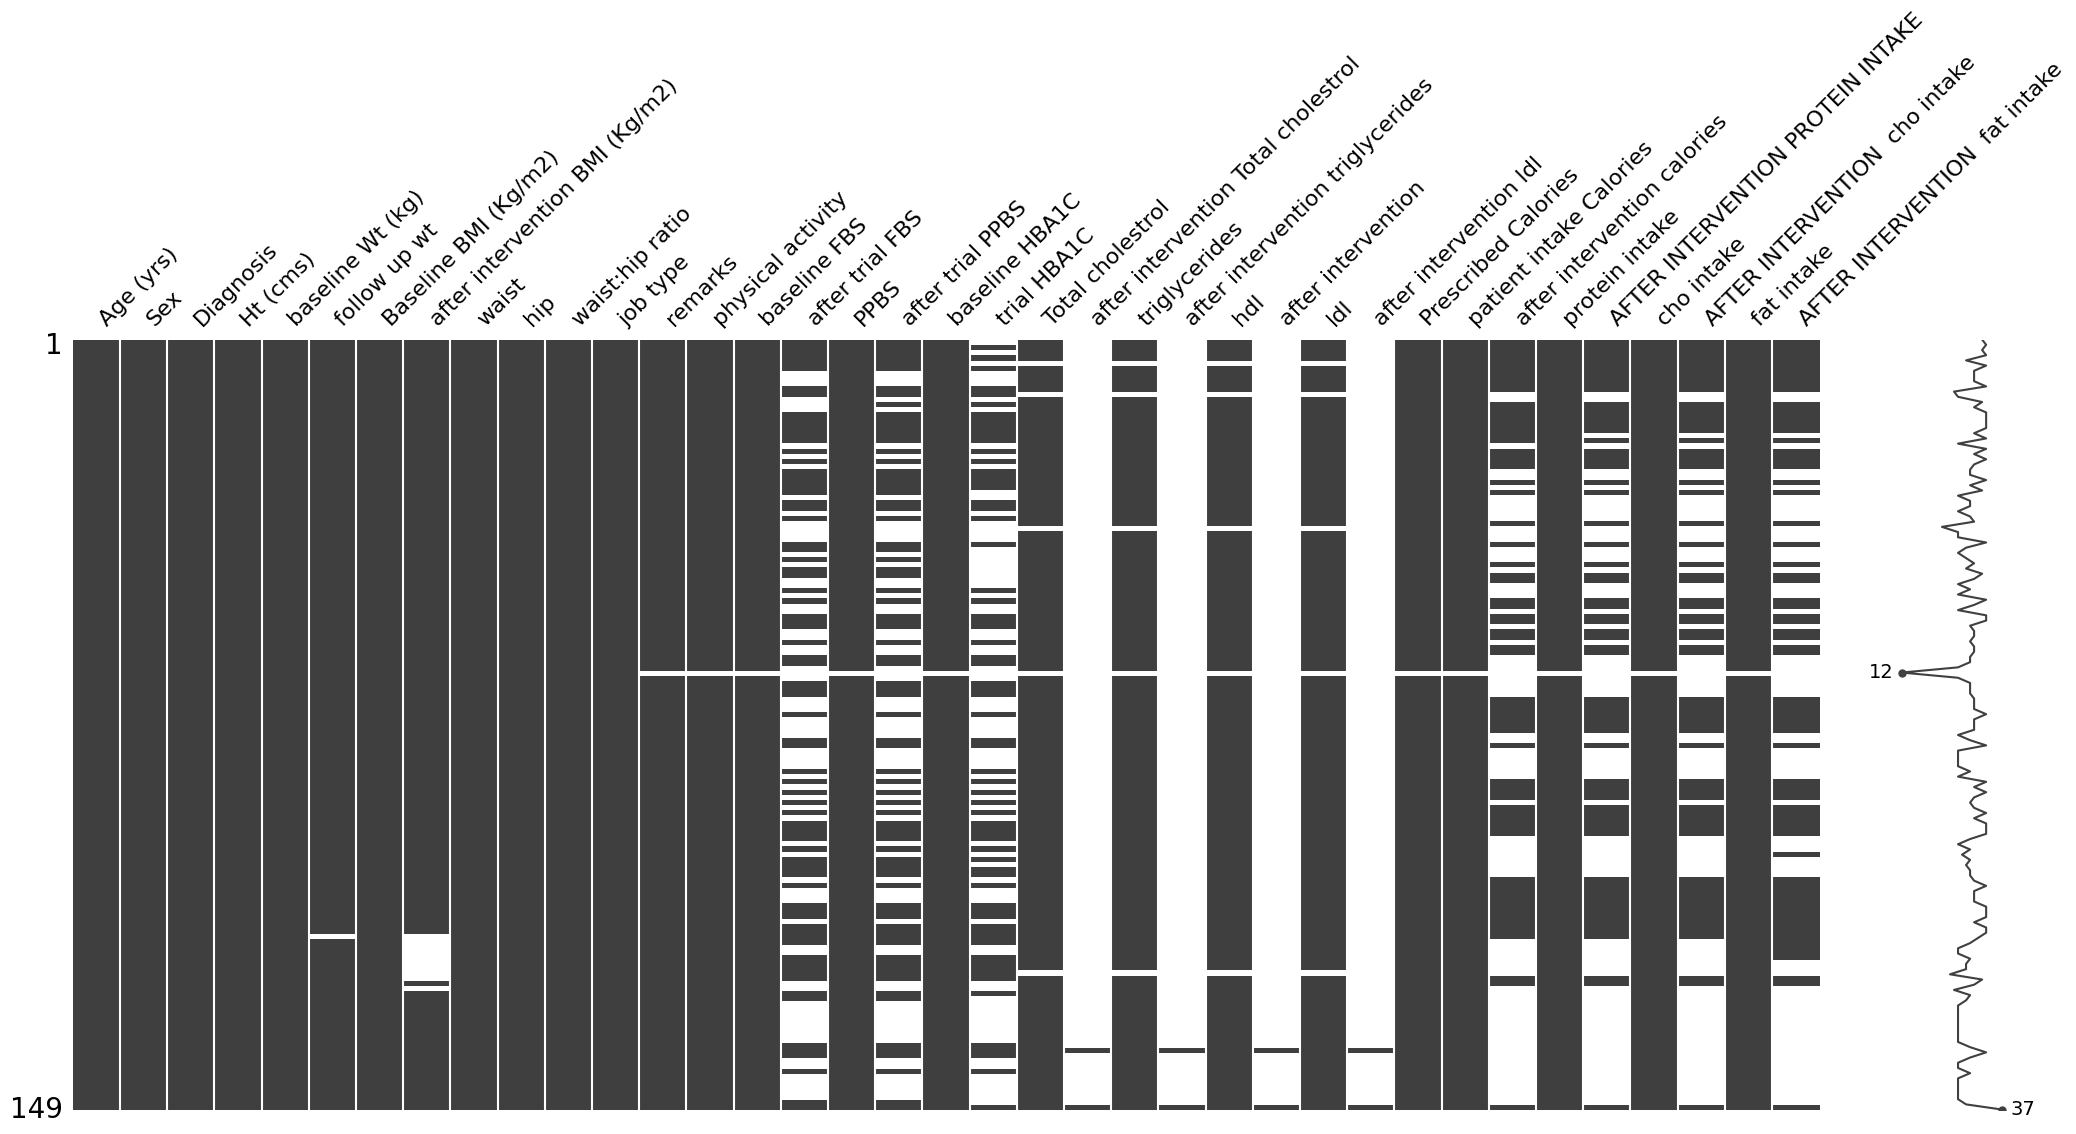

In [230]:
msno.matrix(df)
plt.show()

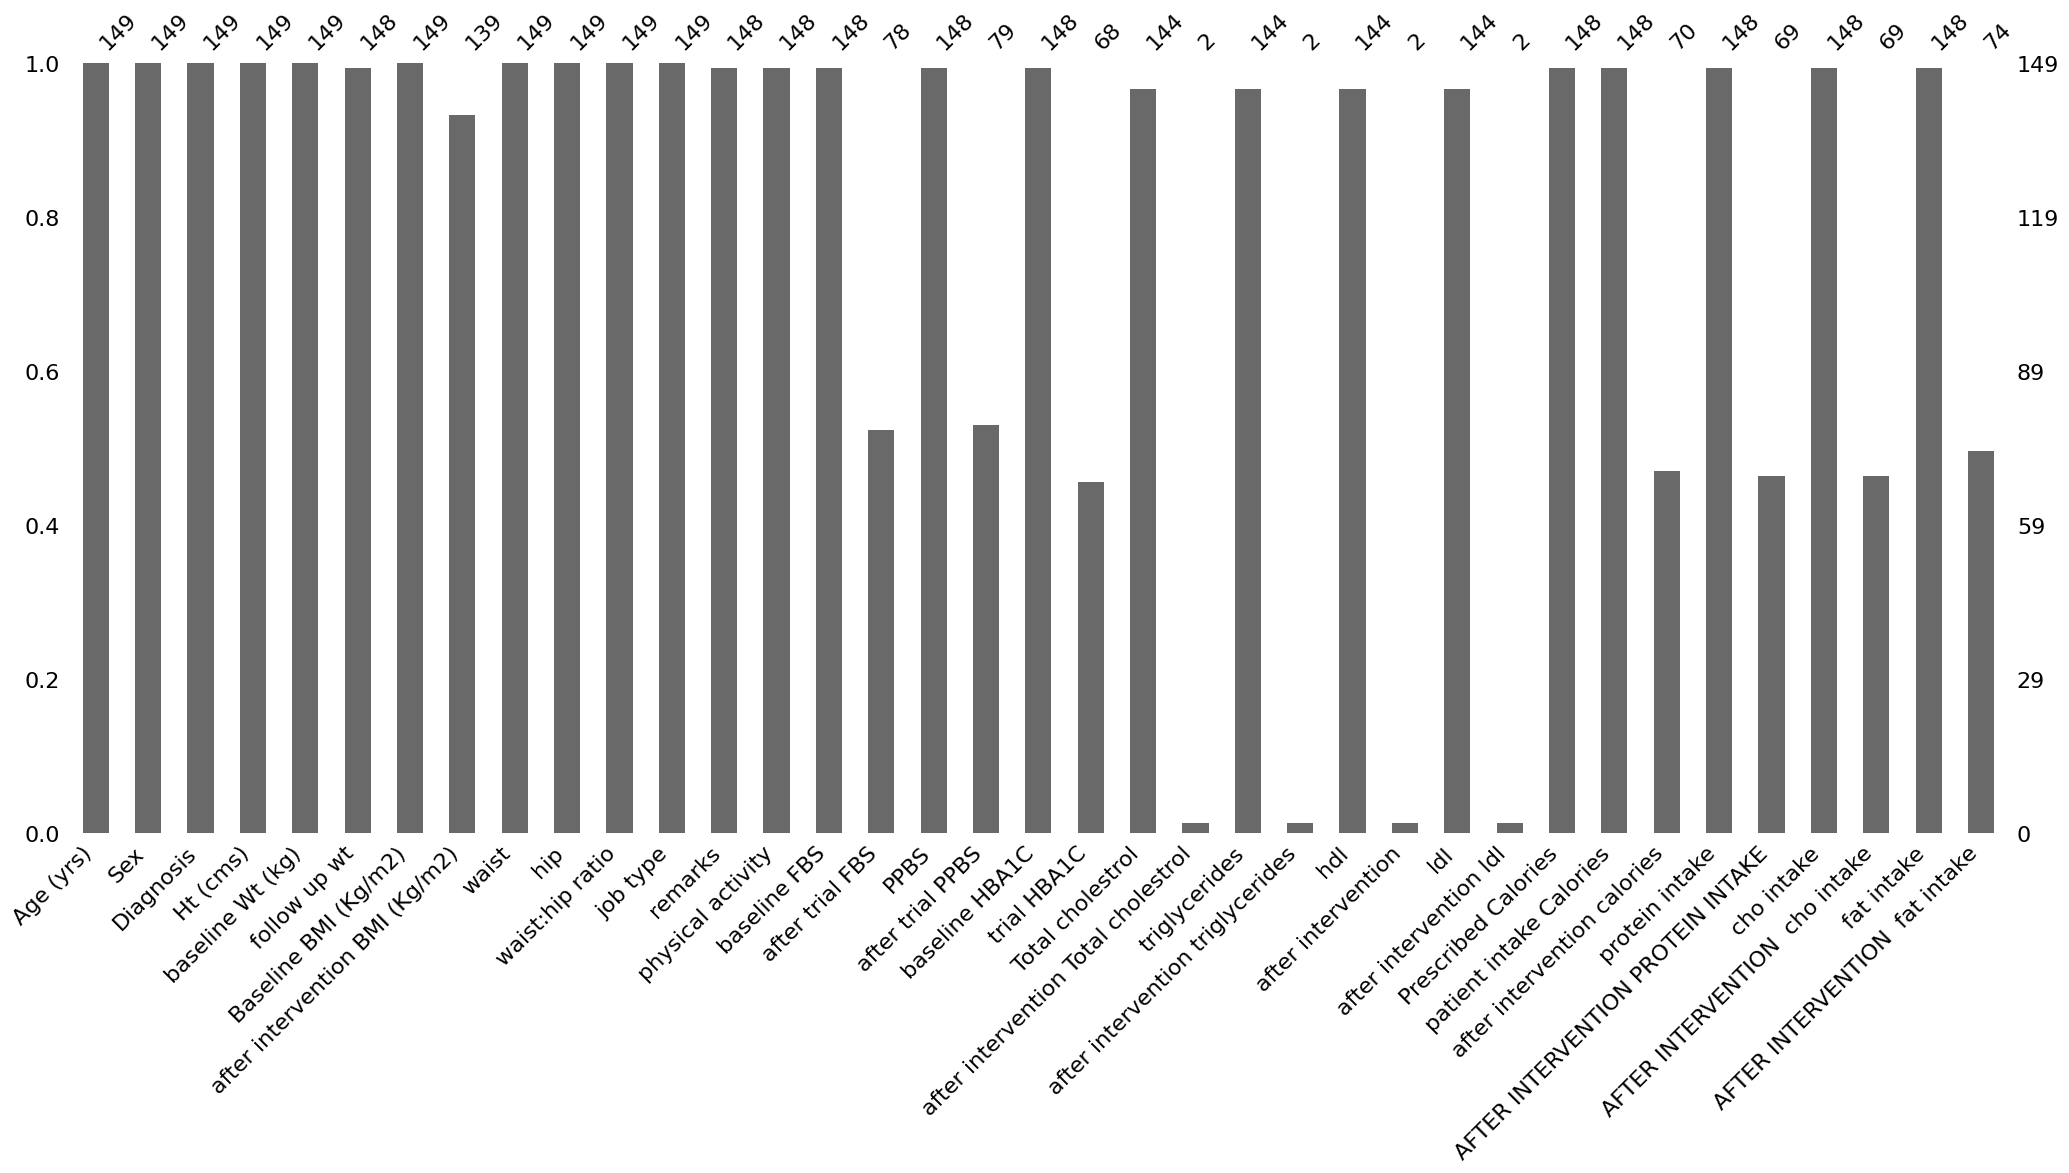

In [231]:
msno.bar(df)
plt.show()

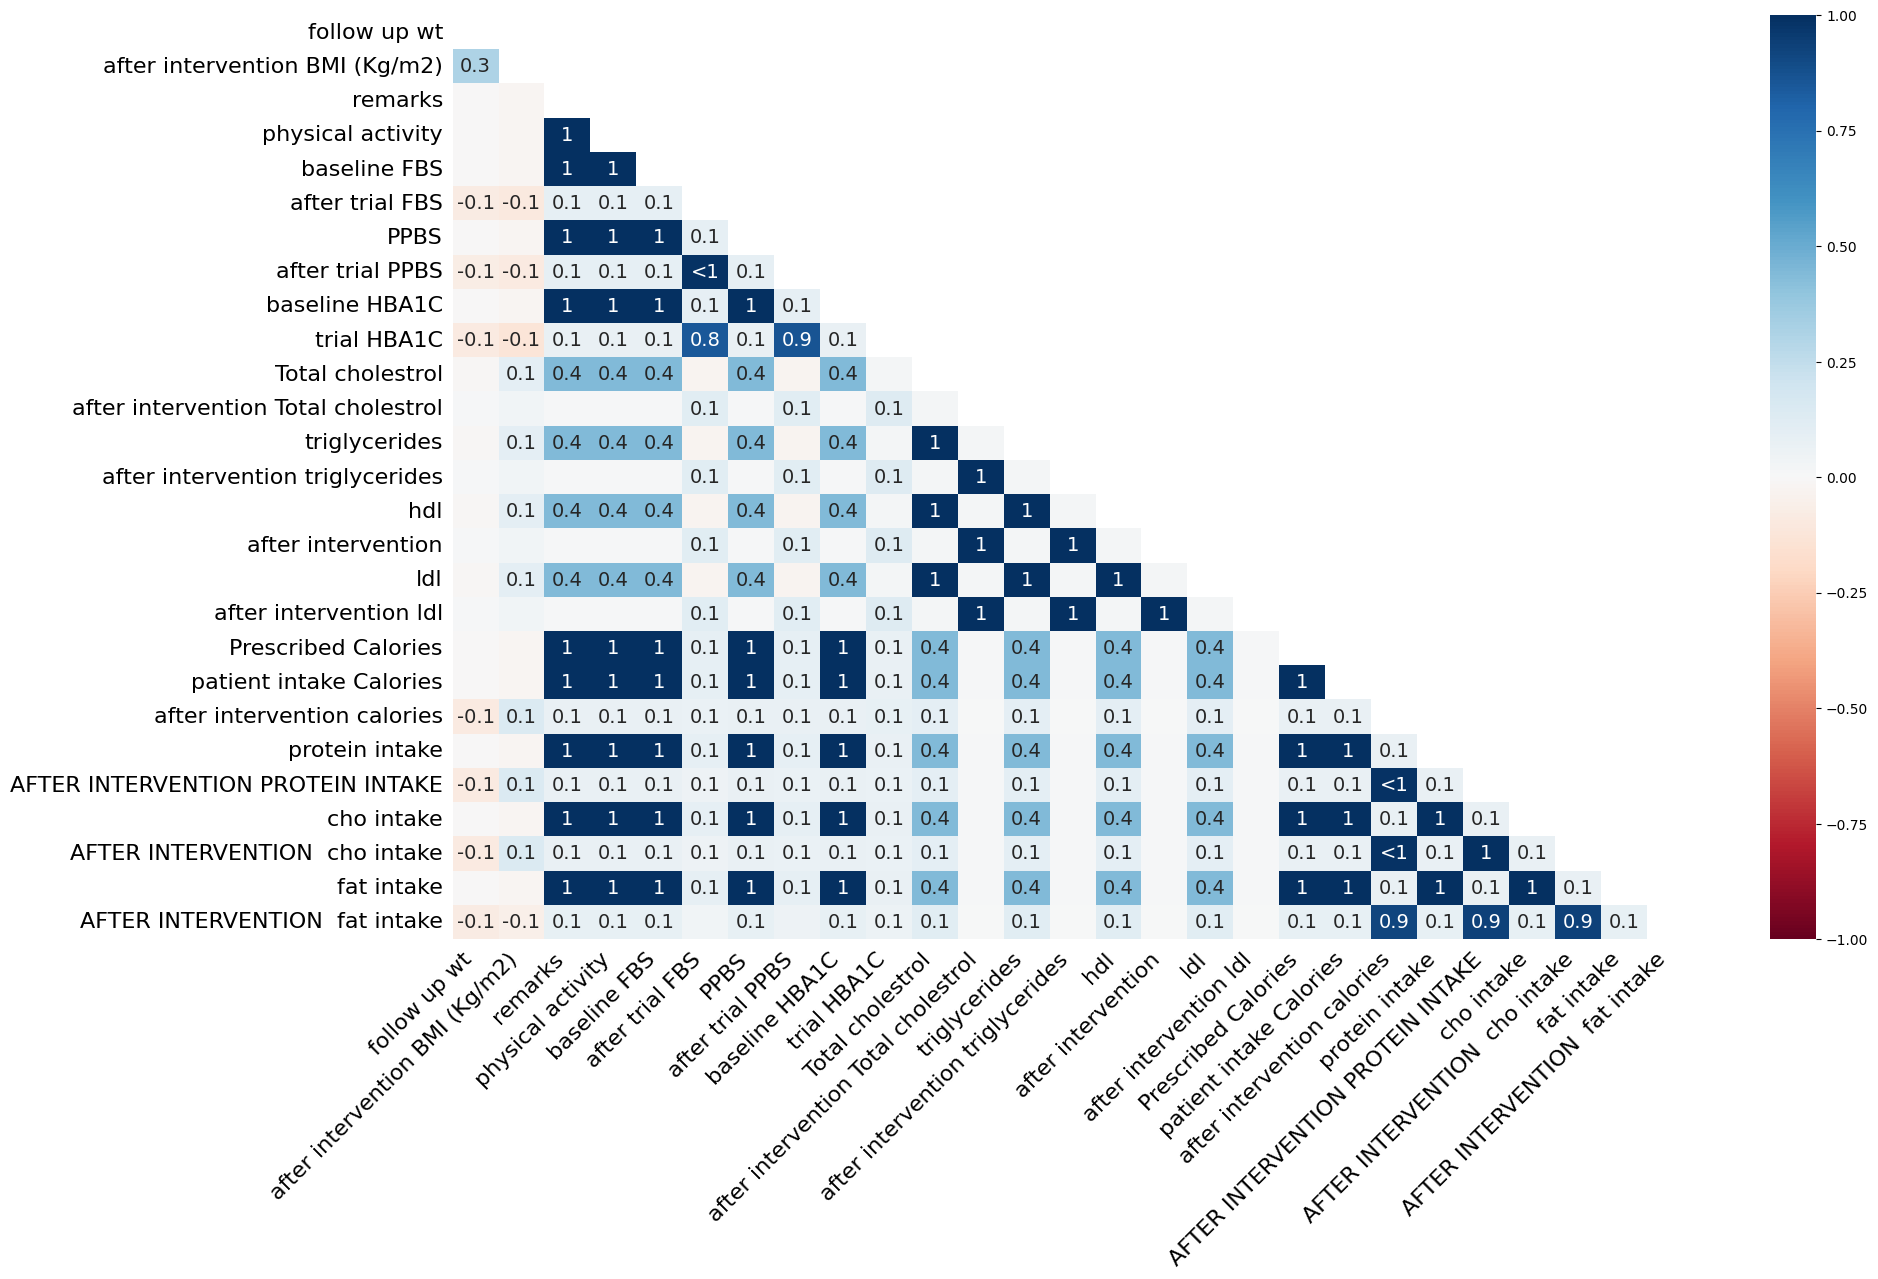

In [232]:
# checking for correlation bet the features with null values
msno.heatmap(df)
plt.show()

In [233]:
df = df.drop(['after intervention triglycerides', 'after intervention Total cholestrol', 'after intervention ldl', 
              'after intervention', 'trial HBA1C', 'AFTER INTERVENTION  cho intake', 'AFTER INTERVENTION PROTEIN INTAKE', 
              'after intervention calories', 'AFTER INTERVENTION  fat intake', 'after trial FBS', 'after trial PPBS', 
              'after intervention BMI (Kg/m2)'], axis = 1)

df = df.drop(['Prescribed Calories','patient intake Calories','protein intake','cho intake','fat intake','follow up wt','remarks'], axis = 1)

In [234]:
df.head()

,Age (yrs),Sex,Diagnosis,Ht (cms),baseline Wt (kg),Baseline BMI (Kg/m2),waist,hip,waist:hip ratio,job type,physical activity,baseline FBS,PPBS,baseline HBA1C,Total cholestrol,triglycerides,hdl,ldl
0,54,2,"diabetic mellitus,obese class2",165,91.00,33.60,41,60,0.68,house wife,no,139.00,156.00,7.30,167.00,93.00,44.00,94.00
1,56,1,"diabetic mellitus,obese class1",164,77.50,29.60,39,48,0.81,bussiness,walking daily 1/2hr,143.00,181.00,9.00,180.00,128.00,36.00,110.00
2,46,1,"diabetic mellitus,obese class1",158,68.80,27.50,38,39,0.97,shop keeper,no,100.00,122.00,6.50,146.00,101.00,34.00,84.00
3,58,2,"diabetic mellitus,obese class2",153,69.80,30.00,39,42,0.92,house wife,walking weekly \nthree times 20mins,211.00,272.00,9.80,138.00,168.00,34.00,73.00
4,57,1,diabetes mellitus obese class 2,174,91.50,30.50,43,44,0.97,bussiness,walking 2 hrs/day,182.00,285.00,10.80,NaN,NaN,NaN,NaN


In [235]:
df.isna().sum()

Age (yrs)               0
Sex                     0
Diagnosis               0
Ht (cms)                0
baseline Wt (kg)        0
Baseline BMI (Kg/m2)    0
waist                   0
hip                     0
waist:hip ratio         0
job type                0
physical activity       1
baseline FBS            1
PPBS                    1
baseline HBA1C          1
Total cholestrol        5
triglycerides           5
hdl                     5
ldl                     5
dtype: int64

In [236]:
# replacing null values with median of respectively column median
df[['baseline FBS', 'PPBS','baseline HBA1C','Total cholestrol','triglycerides','hdl','ldl']] = df[['baseline FBS', 'PPBS','baseline HBA1C','Total cholestrol','triglycerides','hdl','ldl']].fillna(df[['baseline FBS', 'PPBS','baseline HBA1C','Total cholestrol','triglycerides','hdl','ldl']].median())

In [237]:
print("Size of Dataset Before dropping the null values: {} rows , {} columns".format(df.shape[0],df.shape[1]+18))
df.dropna(axis=0,inplace = True)
print("Size of Dataset After dropping the null values: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset Before dropping the null values: 149 rows , 36 columns
Size of Dataset After dropping the null values: 148 rows , 18 columns


# Feature Engineering

In [238]:
df.columns

Index(['Age (yrs)', 'Sex', 'Diagnosis', 'Ht (cms)', 'baseline Wt (kg)', 'Baseline BMI (Kg/m2)', 'waist', 'hip', 'waist:hip ratio', 'job type', 'physical activity', 'baseline FBS', 'PPBS', 'baseline HBA1C', 'Total cholestrol', 'triglycerides', 'hdl', 'ldl'], dtype='object')

In [239]:
df['Age (yrs)'].value_counts()

57    15
53    13
59    13
58    10
54     8
51     8
56     8
52     7
49     7
50     6
44     6
55     6
46     6
48     5
41     5
47     4
40     4
43     3
42     3
45     2
31     2
38     2
39     1
37     1
30     1
66     1
24     1
Name: Age (yrs), dtype: int64

In [240]:
df['Diagnosis'].value_counts()

diabetes mellitus obese class 2     62
diabetes mellitus obese class 1     58
diabetes mellitus severe obesity    10
diabetes mellitus,obese class1       9
diabetic mellitus,obese class1       4
diabetic mellitus,obese class2       3
diabetic mellitus,obese grade 2      2
Name: Diagnosis, dtype: int64

In [241]:
df['Diagnosis'] = df['Diagnosis'].replace(['diabetes mellitus,obese class1'], 'diabetes mellitus obese class 1')
df['Diagnosis'] = df['Diagnosis'].replace(['diabetic mellitus,obese class1'], 'diabetes mellitus obese class 1')
df['Diagnosis'] = df['Diagnosis'].replace(['diabetic mellitus,obese class2'], 'diabetes mellitus obese class 2')
df['Diagnosis'] = df['Diagnosis'].replace(['diabetic mellitus,obese grade 2'], 'diabetes mellitus obese class 2')
df['Diagnosis'] = df['Diagnosis'].replace(['diabetes mellitus severe obesity'], 'diabetes mellitus obese class 2')

In [242]:
df['Diagnosis'].value_counts()

diabetes mellitus obese class 2    77
diabetes mellitus obese class 1    71
Name: Diagnosis, dtype: int64

In [243]:
df['job type'].value_counts()

bussiness           80
homemaker           44
house wife           7
shop keeper          5
retired officer      3
doctor               1
medical rep          1
pharmacist           1
teacher              1
no                   1
icf                  1
retired police       1
retired              1
export bussiness     1
Name: job type, dtype: int64

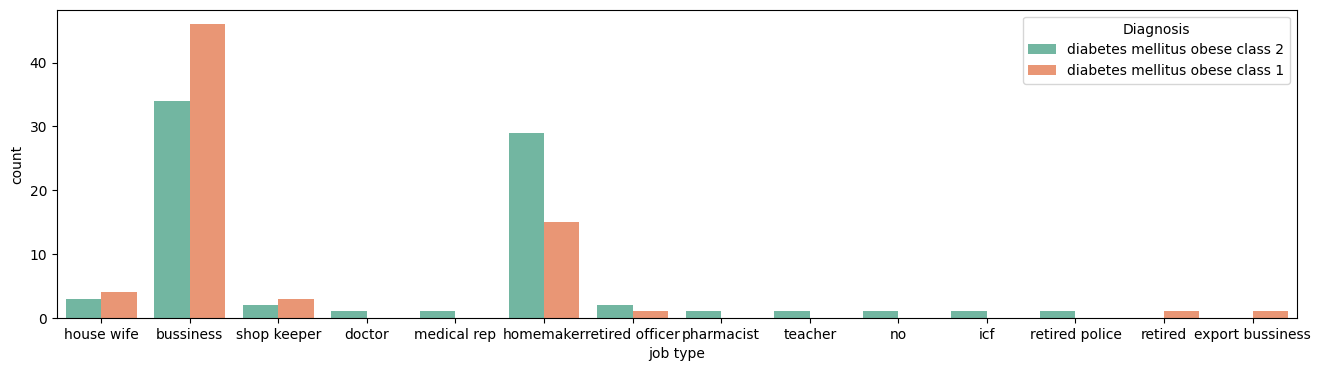

In [244]:
plt.figure(
    figsize=(16, 4),  # Set the figure size here
    dpi=100,  # Set the dpi (or resolution) here
)
sns.countplot(x='job type',hue = "Diagnosis", palette = "Set2",data = df)
plt.show()

In [245]:
df.drop(["job type"],axis=1,inplace = True)

In [246]:
df['physical activity'].value_counts()

no                                     81
walking 1/2hr                          16
walking 1 hr/day                       11
walking 10-15mins                       5
walking 20mins/day                      4
walking daily 1/2hr                     4
walking 1hr                             3
walking 30min/day                       3
walking 45mins                          2
walking1/2hr                            2
walking 45min/day                       2
walking 40mins/day                      2
walking 1hr weekly 3 times              1
walking 20min/day                       1
walking 1/2hr,hypoglycemia              1
walking 2 hrs/day                       1
walking 30mins                          1
swimming 1hr                            1
walking weekly \nthree times 20mins     1
walking 45-1hr                          1
walking 1hr/day                         1
exercise for 1hr                        1
walking 35mins a day                    1
walking 50mins a day              

In [247]:
df['physical activity'] = df['physical activity'].replace(['walking 1/2hr','walking 30min/day','walking1/2hr','walking 35mins a day','walking daily 1/2hr','walking 1/2hr,hypoglycemia','walking 30mins'], 'walking 30 mins')
df['physical activity'] = df['physical activity'].replace(['walking 1 hr/day','walking 1hr','swimming 1hr','walking 1hr/day','walking 50mins a day'], 'walking 1 hr')
df['physical activity'] = df['physical activity'].replace(['walking 10-15mins','walking 20mins/day','walking 20min/day'], 'walking 15 mins')
df['physical activity'] = df['physical activity'].replace(['walking 45mins','walking 45min/day','walking 40mins/day','walking 45-1hr','walking 45mins a day'], 'walking 45 mins')
df['physical activity'] = df['physical activity'].replace(['walking 1hr weekly 3 times','walking weekly \nthree times 20mins'], 'walking 3hr weekly')
df['physical activity'] = df['physical activity'].replace(['exercise for 1hr'], 'exercise 1hr')

In [248]:
df['physical activity'].value_counts()

no                    81
walking 30 mins       28
walking 1 hr          17
walking 15 mins       10
walking 45 mins        8
walking 3hr weekly     2
walking 2 hrs/day      1
exercise 1hr           1
Name: physical activity, dtype: int64

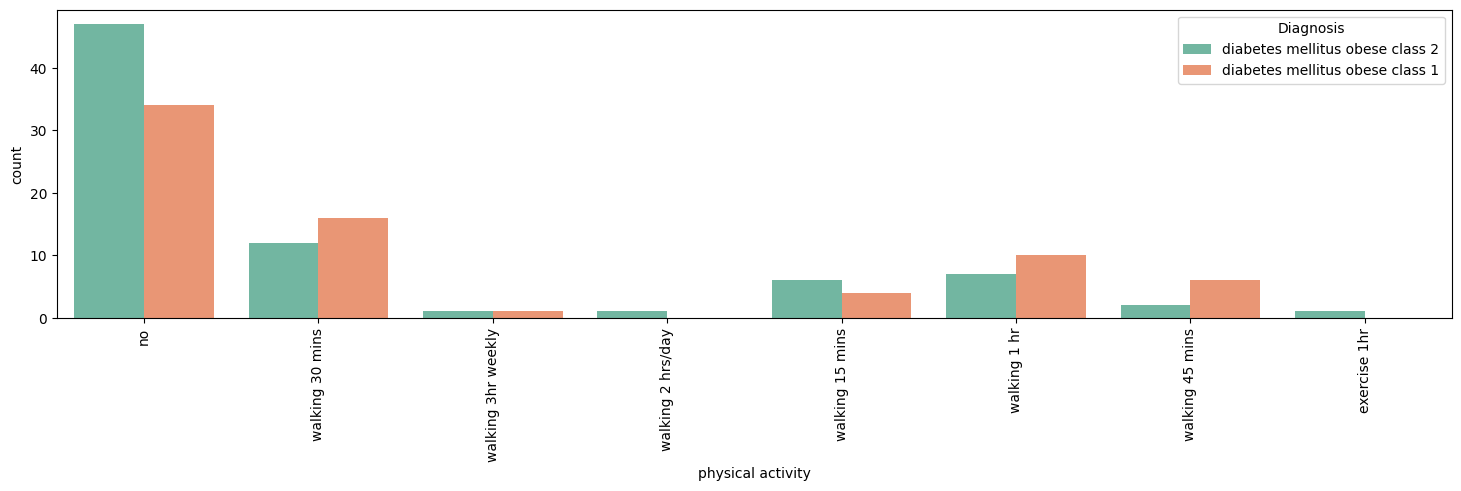

In [249]:
#Create a new figure object with the specified size and resolution
plt.figure(
    figsize=(18, 4),  # Set the figure size here
    dpi=100,  # Set the dpi (or resolution) here
)
sns.countplot(x='physical activity',hue = "Diagnosis", palette = "Set2",data = df)

plt.xticks(rotation=90)
plt.show()

In [250]:
df.drop(["physical activity"],axis=1,inplace = True)

# Data Visualization

In [251]:
fig = px.histogram(df, x="Age (yrs)", color="Diagnosis",text_auto=True,template='plotly_dark')
fig.update_layout(bargap=0.2)
fig.show()

In [252]:
px.histogram(df, x='Sex', color="Diagnosis", barmode='group',text_auto=True,template='plotly_dark')

In [253]:
px.histogram(df, x='Ht (cms)', color="Diagnosis",text_auto=True,template='plotly_dark')

In [254]:
px.histogram(df, x='baseline Wt (kg)', color="Diagnosis",text_auto=True,template='plotly_dark')

In [255]:
px.histogram(df, x='Baseline BMI (Kg/m2)', color="Diagnosis",text_auto=True,template='plotly_dark')

In [256]:
px.histogram(df, x='waist', color="Diagnosis",text_auto=True,template='plotly_dark')

In [257]:
px.histogram(df, x='hip', color="Diagnosis",text_auto=True,template='plotly_dark')

In [258]:
px.histogram(df, x='waist:hip ratio', color="Diagnosis",text_auto=True,template='plotly_dark')

In [259]:
px.histogram(df, x='baseline FBS', color="Diagnosis",text_auto=True,template='plotly_dark')

In [260]:
px.histogram(df, x='PPBS', color="Diagnosis",text_auto=True,template='plotly_dark')

In [261]:
px.histogram(df, x='Total cholestrol', color="Diagnosis",text_auto=True,template='plotly_dark')

In [262]:
px.histogram(df, x='baseline HBA1C', color="Diagnosis",text_auto=True,template='plotly_dark')

In [263]:
px.histogram(df, x='triglycerides', color="Diagnosis",text_auto=True,template='plotly_dark')

In [264]:
px.histogram(df, x='ldl', color="Diagnosis",text_auto=True,template='plotly_dark')

In [265]:
px.histogram(df, x='hdl', color="Diagnosis",text_auto=True,template='plotly_dark')

# Handling Outliers

In [266]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
for cols in numeric_columns:
  if cols != 'Sex':
    print(f"\n\n {cols} \n")
    mean = np.mean(df[cols])
    std = np.std(df[cols])
    print('mean is', mean)
    print('std. deviation is', std)
    threshold = 3
    outlier = []
    for i in df[cols]:
        z = (i-mean)/std
        if z > threshold:
            outlier.append(i)
    if len(outlier) != 0:
      print('outliers are', outlier)
    else:
      print("No Outliers")



 Age (yrs) 

mean is 50.86486486486486
std. deviation is 6.992900500805866
No Outliers


 Ht (cms) 

mean is 162.22972972972974
std. deviation is 8.619662151304404
No Outliers


 baseline Wt (kg) 

mean is 80.44189189189188
std. deviation is 12.565208366183583
outliers are [122.0, 133.6]


 Baseline BMI (Kg/m2) 

mean is 31.12445945945946
std. deviation is 5.631695088752656
outliers are [52.1, 78.0]


 waist 

mean is 39.58783783783784
std. deviation is 4.1960873893555695
outliers are [60, 58]


 hip 

mean is 43.17567567567568
std. deviation is 5.114521213776035
outliers are [60, 61, 60, 59]


 waist:hip ratio 

mean is 0.9072297297297296
std. deviation is 0.07880716240211227
No Outliers


 baseline FBS 

mean is 159.52702702702703
std. deviation is 58.22840000237949
outliers are [432.0, 362.0]


 PPBS 

mean is 250.9391891891892
std. deviation is 81.34205607082397
outliers are [502.0, 535.0]


 baseline HBA1C 

mean is 8.469594594594595
std. deviation is 1.5706195534222804
outliers

In [267]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
for cols in numeric_columns:
  if cols != 'Sex':
    x = math.floor(df[cols].quantile(0.00))
    y = math.floor(df[cols].quantile(0.95))

    df[cols] = np.where(df[cols] < x, x,df[cols])
    df[cols] = np.where(df[cols] > y, y,df[cols])

# Checking For Multicollinearity

In [268]:
df1 = df.copy(deep=True)

In [269]:
df1['Diagnosis'] = pd.Categorical(df1['Diagnosis']).codes
df1['Diagnosis'].value_counts()

1    77
0    71
Name: Diagnosis, dtype: int64

In [270]:
df_corr = df1.corr() # Generate correlation matrix
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis',
    zmax = 1,
    zmin = -1
    )
fig.show()

In [271]:
df['Diagnosis'].value_counts()

diabetes mellitus obese class 2    77
diabetes mellitus obese class 1    71
Name: Diagnosis, dtype: int64

In [272]:
df2 = df.copy(deep=True)

In [273]:
df2 = pd.get_dummies(df2, columns = ['Diagnosis'])

In [274]:
df_corr = df2.corr() # Generate correlation matrix
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis',
    zmax = 1,
    zmin = -1
    )
fig.show()

In [275]:
df['Diagnosis'] = pd.Categorical(df['Diagnosis']).codes

In [276]:
correlation_martix = df.corr()
correlation_martix.sort_values('Diagnosis', ascending=False)

,Age (yrs),Sex,Diagnosis,Ht (cms),baseline Wt (kg),Baseline BMI (Kg/m2),waist,hip,waist:hip ratio,baseline FBS,PPBS,baseline HBA1C,Total cholestrol,triglycerides,hdl,ldl
Diagnosis,-0.04,0.20,1.00,-0.21,0.43,0.75,0.38,0.51,-0.11,0.07,-0.01,0.00,0.04,0.10,0.06,0.05
Baseline BMI (Kg/m2),-0.10,0.24,0.75,-0.19,0.65,1.00,0.60,0.65,-0.08,-0.01,-0.07,-0.03,0.06,0.10,0.10,0.00
hip,-0.04,0.03,0.51,0.08,0.62,0.65,0.59,1.00,-0.18,-0.10,-0.06,-0.08,-0.02,0.07,0.05,-0.02
baseline Wt (kg),-0.18,-0.25,0.43,0.56,1.00,0.65,0.75,0.62,0.17,0.01,-0.01,-0.00,0.06,0.14,-0.07,0.06
waist,0.03,-0.30,0.38,0.31,0.75,0.60,1.00,0.59,0.38,-0.08,-0.09,-0.09,-0.07,0.04,-0.02,-0.04
Sex,-0.12,1.00,0.20,-0.61,-0.25,0.24,-0.30,0.03,-0.43,-0.04,-0.08,-0.06,0.07,-0.02,0.20,0.05
triglycerides,0.04,-0.02,0.10,0.08,0.14,0.10,0.04,0.07,0.06,0.14,0.16,0.08,0.42,1.00,-0.14,0.37
baseline FBS,-0.14,-0.04,0.07,0.04,0.01,-0.01,-0.08,-0.10,0.04,1.00,0.75,0.71,0.20,0.14,0.05,0.18
hdl,0.04,0.20,0.06,-0.20,-0.07,0.10,-0.02,0.05,-0.25,0.05,0.07,-0.04,0.23,-0.14,1.00,0.10
ldl,-0.16,0.05,0.05,0.05,0.06,0.00,-0.04,-0.02,-0.11,0.18,0.24,0.13,0.90,0.37,0.10,1.00


In [279]:
# Select 8 highly correlated features using correlation map
cols = ['Baseline BMI (Kg/m2)','hip','baseline Wt (kg)','waist','Sex','triglycerides','baseline FBS','Total cholestrol','Diagnosis']
df = df[cols]

# Model Building

In [282]:
y = df['Diagnosis']
x = df.drop(['Diagnosis'],axis = 1)

<Axes: >

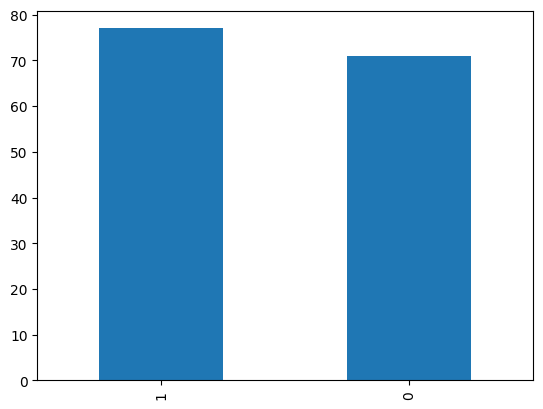

In [283]:
# our data is a imbalanced data
y.value_counts().plot(kind = 'bar')

In [284]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [291]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 11.36it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
BaggingClassifier                  0.97               0.97     0.97      0.97        0.11
DecisionTreeClassifier             0.95               0.95     0.95      0.95        0.04
XGBClassifier                      0.95               0.94     0.94      0.95        0.41
RandomForestClassifier             0.92               0.92     0.92      0.92        0.27
Perceptron                         0.92               0.92     0.92      0.92        0.02
AdaBoostClassifier                 0.89               0.89     0.89      0.89        0.38
LinearSVC                          0.89               0.89     0.89      0.89        0.03
LGBMClassifier                     0.89               0.89     0.89      0.89        0.10
BernoulliNB                        0.86               0.87     0.87      0.86        0.03
NuSVC     

In [319]:
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
print(classification_report(y_pred,y_test))

Accuracy score :  0.9459459459459459
r2 score :  0.7797619047619049
precision score :  0.9459459459459459
recall score :  0.9459459459459459
f1 score :  0.9459459459459459

classification report 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.90      0.95        21

    accuracy                           0.95        37
   macro avg       0.94      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



In [320]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize XGBClassifier
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.6}
Best score: 0.9189


In [321]:
xgbc = XGBClassifier(**grid_search.best_params_)

xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
print(classification_report(y_pred,y_test))

Accuracy score :  0.972972972972973
r2 score :  0.8911764705882352
precision score :  0.972972972972973
recall score :  0.972972972972973
f1 score :  0.972972972972973

classification report 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.95      0.97        20

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [322]:
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
print(classification_report(y_pred,y_test))

Accuracy score :  0.918918918918919
r2 score :  0.6735294117647059
precision score :  0.918918918918919
recall score :  0.918918918918919
f1 score :  0.918918918918919

classification report 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.95      0.90      0.92        20

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



In [323]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}]
}

# Initialize RandomForestClassifier
Classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")


Best parameters: {'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.9099


Accuracy score :  0.918918918918919
r2 score :  0.6735294117647059
precision score :  0.918918918918919
recall score :  0.918918918918919
f1 score :  0.918918918918919

classification report 



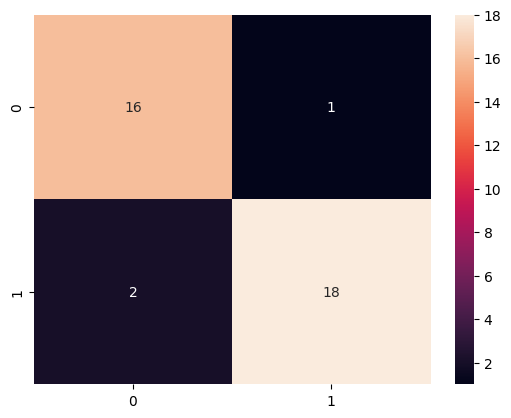

In [324]:
classifier = RandomForestClassifier(**grid_search.best_params_)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

Accuracy score :  0.8648648648648649
r2 score :  0.4590643274853802
precision score :  0.8648648648648649
recall score :  0.8648648648648649
f1 score :  0.8648648648648649

classification report 



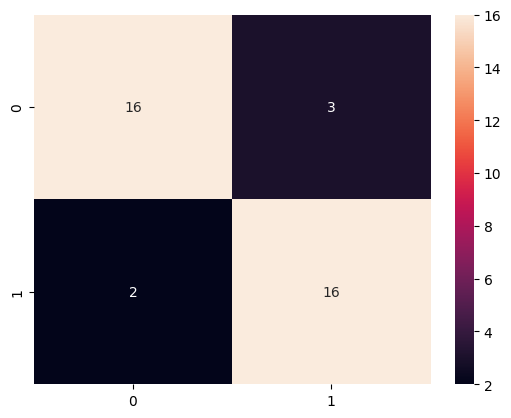

In [325]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()      

In [326]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}]
}

# Initialize LogisticRegression
Classifier = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.8919


Accuracy score :  0.918918918918919
r2 score :  0.6754385964912282
precision score :  0.918918918918919
recall score :  0.918918918918919
f1 score :  0.918918918918919

classification report 



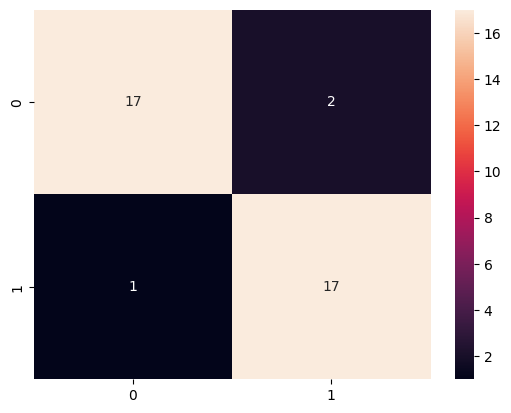

In [327]:
classifier = LogisticRegression(**grid_search.best_params_)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()       

Accuracy score :  0.8378378378378378
r2 score :  0.3392857142857145
precision score :  0.8378378378378378
recall score :  0.8378378378378378
f1 score :  0.8378378378378378

classification report 



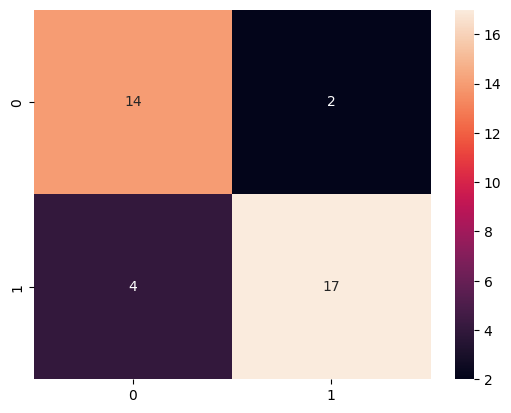

In [328]:
classifier =  KNeighborsClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()    

In [329]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3],
    'leaf_size': [20, 30, 40]
}

# Initialize KNeighborsClassifier
Classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score: 0.8829


Accuracy score :  0.8378378378378378
r2 score :  0.3470588235294121
precision score :  0.8378378378378378
recall score :  0.8378378378378378
f1 score :  0.8378378378378378

classification report 



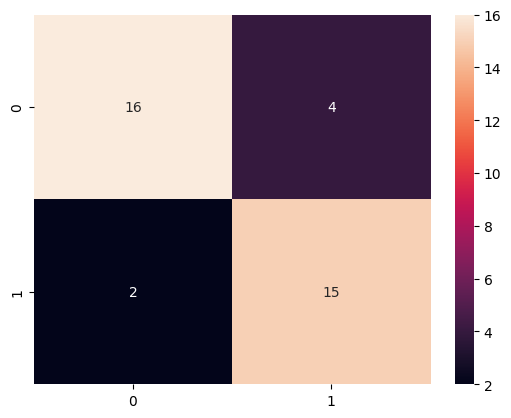

In [330]:
classifier =  KNeighborsClassifier(**grid_search.best_params_)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()    

Accuracy score :  0.8648648648648649
r2 score :  0.45906432748538006
precision score :  0.8648648648648649
recall score :  0.8648648648648649
f1 score :  0.8648648648648649

classification report 



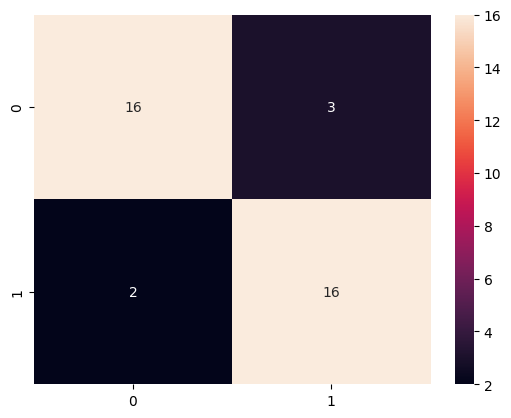

In [331]:
classifier = SVC()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

In [332]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialize KNeighborsClassifier
Classifier = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best score: 0.8739


Accuracy score :  0.8648648648648649
r2 score :  0.43939393939393945
precision score :  0.8648648648648649
recall score :  0.8648648648648649
f1 score :  0.8648648648648649

classification report 



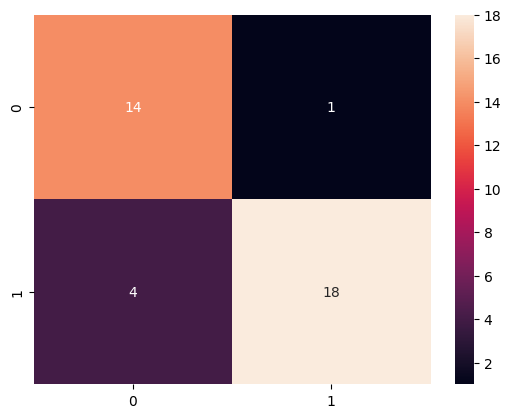

In [333]:
classifier = SVC(**grid_search.best_params_)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

# Final model

Accuracy score :  0.972972972972973
r2 score :  0.8911764705882352
precision score :  0.972972972972973
recall score :  0.972972972972973
f1 score :  0.972972972972973

classification report 



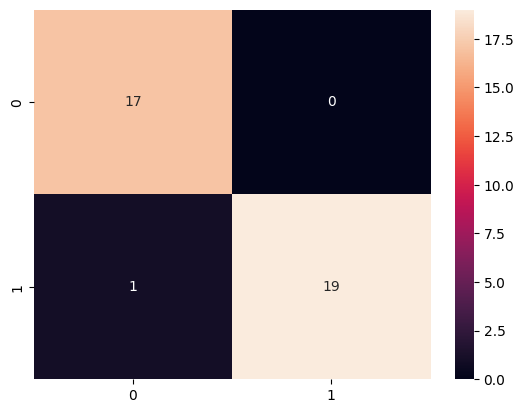

In [335]:
xgbc = XGBClassifier(learning_rate =  0.01, max_depth = 3, min_child_weight = 5, n_estimators = 50, subsample = 0.6)

xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

In [336]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(xgbc, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)